# Pythia Minbias Event Generation

### Pythia try

In [1]:
import sys
cfg = open("/home/arif/hep_tools/pythia8235/examples/Makefile.inc")
lib = "/home/arif/hep_tools/pythia8235/lib"
for line in cfg:
    if line.startswith("PREFIX_LIB="): lib = line[11:-1]; break
sys.path.insert(0, lib)

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
import pythia8
import numpy as np

In [4]:
pythia = pythia8.Pythia()

### Minbias Events

In [5]:
pythia.readString("Main:numberOfEvents = 100")
pythia.readString("Beams:eCM = 13000.")
pythia.readString("Beams:eA = 6500.")
pythia.readString("Beams:eB = 6500.")
pythia.readString("Beams:pzA = 6500.")
pythia.readString("Beams:pzB = -6500.")
pythia.readString("SoftQCD:all = on")
pythia.readString("SoftQCD:nonDiffractive = on")
pythia.readString("SoftQCD:elastic = on")
pythia.readString("SoftQCD:singleDiffractive = on")
pythia.readString("SoftQCD:doubleDiffractive = on")
pythia.readString("SoftQCD:centralDiffractive = on")
pythia.readString("SoftQCD:inelastic = on")

True

In [6]:
pythia.init()

True

In [7]:
mult = pythia8.Hist("charged multiplicity", 100, -0.5, 799.5)

## Write to a file

In [8]:
charged = []
pT = []
hist_pT = []
out_filename = "output_events.txt"
with open(out_filename, 'w') as out_file:
    for iEvent in range(1):
        event_pT = []
        if not pythia.next(): continue
        # Find number of all final charged particles and fill histogram.
        nCharged = 0
        for prt in pythia.event:
            if(prt.isFinal() and prt.isCharged()): 
                nCharged += 1
                pT.append(prt.pT())
                event_pT.append(prt.pT())
                event_parameters = [prt.id(),prt.charge(), prt.pT(), prt.theta(), prt.phi(), prt.eta(), 
                                    prt.px(), prt.py(), prt.pz(), prt.e()]
                out_file.write(str(event_parameters)+'\n')
        out_file.write('\n')
        hist_pT.append(np.max(event_pT))
        charged.append(nCharged)
        

## Read the events

In [9]:
out_filename = "output_events.txt"

In [10]:
with open(out_filename) as f:
    particleList = f.readlines()
    
# you may also want to remove whitespace characters like `\n` at the end of each line
particleList = [x.strip() for x in particleList] 
particleList = [x.replace("[","").replace("]","") for x in particleList]
particleList.pop(-1)

particles = []
for i in range(len(particleList)):
    particleParameters = [float(parameter) for parameter in particleList[i].split(",")]
    particles.append(particleParameters)


<IPython.core.display.Javascript object>


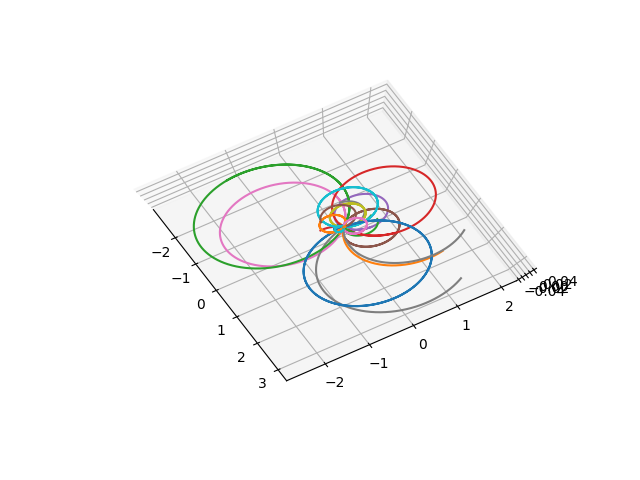

('Particle R: ', 0.16960131164760325)
('Particle R: ', 0.3089657322983476)
('Particle R: ', 0.5304288588188724)
('Particle R: ', 0.37234507251315596)
('Particle R: ', 0.5279152198577075)
('Particle R: ', 0.5570402865591056)
('Particle R: ', 1.2294190958843059)
('Particle R: ', 1.5279118197186379)
('Particle R: ', 0.8024276758070064)
('Particle R: ', 0.7600452723790639)
('Particle R: ', 0.08800545380030497)
('Particle R: ', 1.1960140369084173)
('Particle R: ', 1.5249142113420315)
('Particle R: ', 0.4747616067489303)
('Particle R: ', 0.37376255044488826)
('Particle R: ', 0.41008702759306886)
('Particle R: ', 0.9379962503747901)
('Particle R: ', 1.946606860236807)
('Particle R: ', 0.2708441053081917)
('Particle R: ', 0.2817206875715713)
('Particle R: ', 0.5300907523138043)
('Particle R: ', 0.7383661403194367)
('Particle R: ', 0.3389108345964189)
('Particle R: ', 1.0186344221492205)
('Particle R: ', 0.337638658989106)
('Particle R: ', 1.2721393315019751)
('Particle R: ', 1.19509353173966)


In [40]:
B = 2 #Tesla

fig = plt.figure()
ax = fig.gca(projection='3d')
for ptr in particles:
    ptrCharge = ptr[1]; ptrPT = ptr[2]; ptrTheta = ptr[3]; ptrPhi = ptr[4]; ptrEta = ptr[5]
    ptrP = np.sqrt(ptr[6]**2 + ptr[7]**2 + ptr[8]**2)

    #print("Particle p: {} - Particle pT = {} - lambda = {}". format(ptrP,ptrPT, pitchAngle))
    R = ptrPT/(0.3*2) #radius in meters
    print("Particle R: ", R)
    #ptrPhi = 0
    phiZero = np.pi/2 + ptrPhi
    # Check the definition of PhiZero!
    
    lmbd = np.pi/2 - ptrTheta
    xs = []; ys =[]; zs =[]
    x = 0; y = 0; z = 0;
    for s in np.arange(0,(4*np.pi*R)/np.cos(lmbd),0.01):
        z = s*np.sin(lmbd)
        if(np.abs(z) > 20):
            break
        x = R*(np.cos(phiZero + (s*np.cos(lmbd)/R)) - np.cos(phiZero))
        y = R*(np.sin(phiZero + (s*np.cos(lmbd)/R)) - np.sin(phiZero))
        
        
        xs.append(x)
        ys.append(y)
        zs.append(z)

    ax.plot(xs, ys, label='parametric curve')
    
plt.show()